In [1]:
%matplotlib widget

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math

def normalize_array(array, iants, obs_type, normScans=[0,0,0]):

    array_norm = np.full(np.shape(array), fill_value=np.nan)
    iants_uq = np.unique(iants)
    obsType_uq = np.unique(obs_type)
    for iant in iants_uq:
        for i, obs in enumerate(obsType_uq):
            conditions = ((iants == iant) & (obs_type==obs))
            indices = np.where(conditions)
            array_sub = array[indices]
            array_norm[indices] = array_sub / array_sub[normScans[i]]

    return array_norm

def map_series_by_dict(a, d):

    v = np.array(list(d.values()))
    k = np.array(list(d.keys()))
    sidx = k.argsort()
    out_ar = v[sidx[np.searchsorted(k,a,sorter=sidx)]]
    return out_ar

def select_array(array, iants, ATM_ids):
    iants_uq = np.unique(iants)
    nants = len(iants_uq)
    array_temp = array.reshape(-1, nants)
    
    array_sel = array_temp[ATM_ids,:]
    array_sel = array_sel.flatten()
    
    return array_sel

In [3]:
tex_textwidth = 14.2

No handles with labels found to put in legend.
No handles with labels found to put in legend.


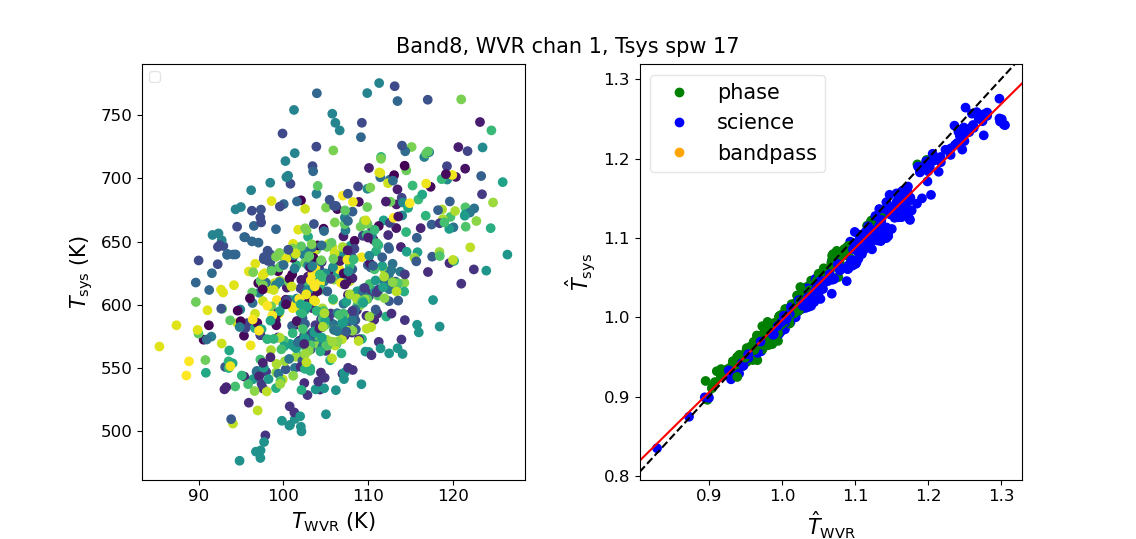

In [4]:
datDir = 'C:/Users/haohe/OneDrive - McMaster University/Astrotech/ALMA_intern/ALMA_intern_Tsys/examples/2018.1.01778.S/'
picDir = 'C:/Users/haohe/OneDrive - McMaster University/Astrotech/ALMA_intern/submission_R3/pictures/'
filename = datDir+'Tsys_WVR_matched_avgTime10.pkl'
with open (filename, 'rb') as pickle_file:
    Tsys_table = pickle.load(pickle_file, encoding='latin')
iants = Tsys_table['iant']
obs_type = Tsys_table['obs_type']
obs_type = obs_type.astype(str)
scans = Tsys_table['scan']
WVR = Tsys_table['WVR_means']
Tsys = Tsys_table['Tsys']
# import the fitting relation from all scans
fitfile = datDir+'Tsys_WVR_fitted_WVRchan1_normScans000.pkl'
with open(fitfile,'rb') as pickle_file:
    fit_table = pickle.load(pickle_file, encoding='latin')

WVR_sinchan = WVR[:,1]
WVR_norm = normalize_array(WVR_sinchan, iants, obs_type, normScans=[0,0,0])
Tsys_sinspw = Tsys[:,0]
Tsys_norm = normalize_array(Tsys_sinspw, iants, obs_type, normScans=[0,0,0])
    
fig = plt.figure(figsize=(0.8*tex_textwidth,0.38*tex_textwidth))
fig.subplots_adjust(wspace=0.3)
# title
title = 'Band8, WVR chan 1, Tsys spw 17'
fig.suptitle(title, y=0.93, fontsize=15)
# plot the absolute values
ax = plt.subplot(121)
ax.tick_params(labelsize=12)
sc = ax.scatter(WVR_sinchan, Tsys_sinspw, c=iants)
# label
plt.xlabel(r'$T_{\mathrm{WVR}}$ (K)', fontsize=15)
plt.ylabel('$T_{\mathrm{sys}}$ (K)', fontsize=15)
plt.legend(loc='upper left', framealpha=0.5)
# plot the normalized values
ax1 = plt.subplot(122)
ax1.tick_params(labelsize=12)
# create color dictionary for the scatter plot
color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange'}
# color_dict["Mean relative error "+str(round(err_rel,4))] = 'black'
# label
plt.xlabel(r'$\hat{T}_\mathrm{WVR}$', fontsize=15)
plt.ylabel(r'$\hat{T}_\mathrm{sys}$', fontsize=15)
plt.legend(loc='upper left', framealpha=0.5)
legendhandle = [plt.plot([], marker="o", ls="", color=color)[0] for color in list(color_dict.values())]
plt.legend(legendhandle,list(color_dict.keys()), loc='upper left', framealpha=0.5, fontsize=15)
sc = ax1.scatter(WVR_norm, Tsys_norm, c=map_series_by_dict(obs_type, color_dict))
# plot the fitting relation
# plot the original fitted results
slope = fit_table[17]['coeff'][0]
intercept = fit_table[17]['coeff'][1]
xlow = ax1.set_xlim()[0]; xhigh = ax1.set_xlim()[1]
ylow = xlow * slope + intercept; yhigh = xhigh * slope + intercept
plt.plot([xlow, xhigh], [ylow, yhigh], color='red', linestyle='solid')
# plot the 1-to-1 relation
lower=max(ax1.set_xlim()[0], ax1.set_ylim()[0])
upper=min(ax1.set_xlim()[1], ax1.set_ylim()[1])
ax1.plot([lower, upper],[lower,upper],ls='--', color='black')
plt.savefig(picDir+'Tsys_Twvr_norm.pdf', bbox_inches='tight', pad_inches=0)

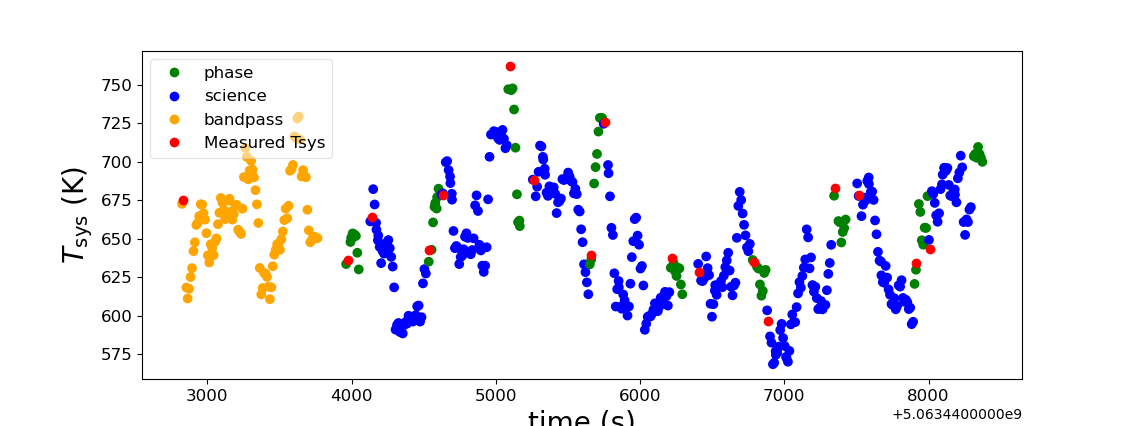

In [5]:
datDir = 'C:/Users/haohe/OneDrive - McMaster University/Astrotech/ALMA_intern/ALMA_intern_Tsys/examples/2018.1.01778.S/'
picDir = 'C:/Users/haohe/OneDrive - McMaster University/Astrotech/ALMA_intern/submission_R2/pictures/'
# Tsys table
filename = datDir+'Tsys_WVR_matched_avgTime10.pkl'
with open (filename, 'rb') as pickle_file:
    Tsys_table = pickle.load(pickle_file, encoding='latin')
iants = Tsys_table['iant']
obs_type = Tsys_table['obs_type']
obs_type = obs_type.astype(str)
scans = Tsys_table['scan']
WVR = Tsys_table['WVR_means']
Tsys = Tsys_table['Tsys']
Tsys_time = Tsys_table['time_Tsys']
# gain table 
filename_gain = datDir+'WVR_gaintable_chanWVR1_avgtime10.pkl'
with open(filename_gain, 'rb') as pickle_file:
    WVR_table = pickle.load(pickle_file, encoding='latin')
iants_WVR = WVR_table['iant']
Tsys_ext = WVR_table['Tsys_ext']
WVR_time = WVR_table['WVR_time']
obsTypes_WVR = WVR_table['obs_type']
Tsys_norm = WVR_table['Tsys_norm']
iant_id = 10
Tsys_ext_sinant = Tsys_ext[np.where(iants_WVR==iant_id)]
WVR_time_sinant = WVR_time[np.where(iants_WVR==iant_id)]
obsTypes_WVR_sinant = obsTypes_WVR[np.where(iants_WVR==iant_id)]

Tsys_orig_sinant = Tsys[np.where(iants==iant_id)]
Tsys_time_sinant = Tsys_time[np.where(iants==iant_id)]

fig = plt.figure(figsize=(0.8*tex_textwidth, 0.3*tex_textwidth))
# fig = plt.figure(figsize=(0.45*tex_textwidth, 0.4*tex_textwidth)) # for research statement
ax = plt.subplot(111)
ax.tick_params(labelsize=12)
plt.ylabel(r'$T_{\mathrm{sys}}$ (K)', fontsize=20)
plt.xlabel('time (s)', fontsize=20)
# create color dictionary for the scatter plot
color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange', 'Measured Tsys':'red'}
legendhandle = [plt.plot([], marker="o", ls="", color=color)[0] for color in list(color_dict.values())]
plt.legend(legendhandle,list(color_dict.keys()), loc='upper left', framealpha=0.5, fontsize=12)
sc = plt.scatter(WVR_time_sinant, Tsys_ext_sinant[:,0], c=map_series_by_dict(obsTypes_WVR_sinant, color_dict))
plt.scatter(Tsys_time_sinant, Tsys_orig_sinant[:,0], color='red')
# fig.tight_layout()

plt.savefig(picDir+'Tsys_extrapolated.pdf', bbox_inches='tight', pad_inches=0)

0.01006599237050408
[0.92094488 0.0789948 ] [0.00702156]


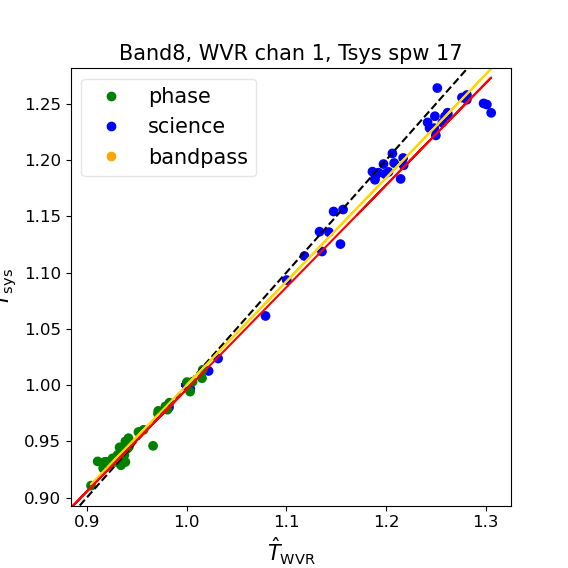

In [6]:
datDir = 'C:/Users/haohe/OneDrive - McMaster University/Astrotech/ALMA_intern/ALMA_intern_Tsys/examples/2018.1.01778.S/'
picDir = 'C:/Users/haohe/OneDrive - McMaster University/Astrotech/ALMA_intern/submission_R2/pictures/'
filename = datDir+'Tsys_WVR_matched_avgTime10.pkl'
with open (filename, 'rb') as pickle_file:
    Tsys_table = pickle.load(pickle_file, encoding='latin')
iants = Tsys_table['iant']
obs_type = Tsys_table['obs_type']
obs_type = obs_type.astype(str)
scans = Tsys_table['scan']
WVR = Tsys_table['WVR_means']
Tsys = Tsys_table['Tsys']
# import the fitting relation from all scans
fitfile = datDir+'Tsys_WVR_fitted_WVRchan1_normScans000.pkl'
with open(fitfile,'rb') as pickle_file:
    fit_table = pickle.load(pickle_file, encoding='latin')

# select only a handful of ATM scans
WVR_norm = normalize_array(WVR_sinchan, iants, obs_type, normScans=[0,0,0])
ATM_ids = [1,2,8,9]
WVR_norm_few = select_array(WVR_norm, iants, ATM_ids)
scans_few = select_array(scans, iants, ATM_ids)
Tsys_sinspw = Tsys[:,0]
Tsys_norm = normalize_array(Tsys_sinspw, iants, obs_type, normScans=[0,0,0])
Tsys_norm_few = select_array(Tsys_norm, iants, ATM_ids)
obs_type_few = select_array(obs_type, iants, ATM_ids)

fig = plt.figure(figsize=(0.4*tex_textwidth, 0.4*tex_textwidth))
ax = plt.subplot(111)
ax.tick_params(labelsize=12)
# create color dictionary for the scatter plot
color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange'}
legendhandle = [plt.plot([], marker="o", ls="", color=color)[0] for color in list(color_dict.values())]
plt.legend(legendhandle,list(color_dict.keys()), loc='upper left', framealpha=0.5, fontsize=15)
# plot the scatter plot
sc = ax.scatter(WVR_norm_few, Tsys_norm_few, c=map_series_by_dict(obs_type_few, color_dict))
# plot the 1-to-1 line
lower=max(ax.set_xlim()[0], ax.set_ylim()[0])
upper=min(ax.set_xlim()[1], ax.set_ylim()[1])
ax.plot([lower, upper],[lower,upper],ls='--', color='black')

# fit the linear relation between normalized Tsys and WVR
xdata = WVR_norm_few; ydata = Tsys_norm_few
idx_nnan = ((~np.isnan(xdata)) & (~np.isnan(ydata)))
fit_results = np.polyfit(xdata[idx_nnan], ydata[idx_nnan], 1, full=True)
fit_coeff = fit_results[0]
fit_err = fit_results[1]
fit_err_rel = np.sqrt(fit_err / len(ydata[idx_nnan])) / np.mean(ydata[idx_nnan])
ydata_fitted = fit_coeff[0] * xdata + fit_coeff[1]

Tsys_ext_norm = fit_coeff[0] * WVR_norm + fit_coeff[1]
scatter = np.sqrt(np.nanmean((Tsys_ext_norm-Tsys_norm)**2)) / np.nanmean(Tsys_norm)
print(scatter)
plt.plot(xdata, ydata_fitted, color='gold', linestyle='solid',
        label=str(round(fit_coeff[0], 4))+'*x+'+str(round(fit_coeff[1], 4))
        +'\n err: '+str(round(fit_err[0], 4)))
print(fit_coeff, fit_err_rel)
    
# plot the original fitted results
slope = fit_table[17]['coeff'][0]
intercept = fit_table[17]['coeff'][1]
Tsys_norm_fitted_orig = slope * WVR_norm + intercept
plt.plot(WVR_norm, Tsys_norm_fitted_orig, color='red', linestyle='solid')
# title
title = 'Band8, WVR chan 1, Tsys spw 17'
plt.title(title, fontsize=15)
# label
plt.xlabel(r'$\hat{T}_\mathrm{WVR}$', fontsize=15)
plt.ylabel(r'$\hat{T}_\mathrm{sys}$', fontsize=15)
plt.savefig(picDir+'Tsys_Twvr_fewer_norm.pdf', bbox_inches='tight', pad_inches=0)

Normalize only to the science scans

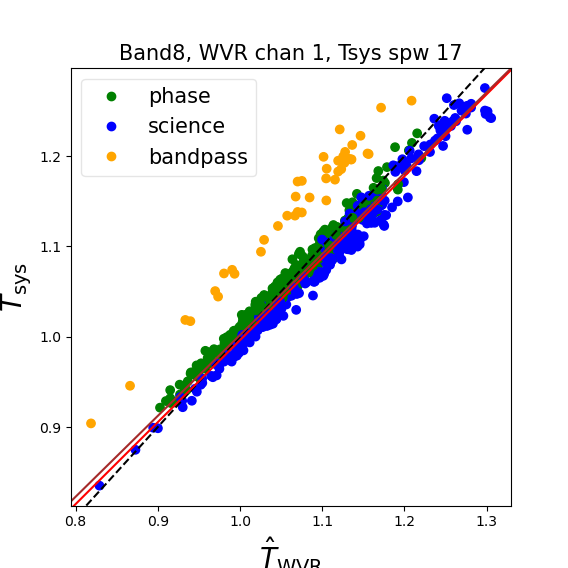

In [9]:
datDir = 'C:/Users/haohe/OneDrive - McMaster University/Astrotech/ALMA_intern/ALMA_intern_Tsys/examples/2018.1.01778.S/'
picDir = 'C:/Users/haohe/OneDrive - McMaster University/Astrotech/ALMA_intern/submission_R3/pictures/'
filename = datDir+'Tsys_WVR_matched_avgTime10.pkl'
with open (filename, 'rb') as pickle_file:
    Tsys_table = pickle.load(pickle_file, encoding='latin')
iants = Tsys_table['iant']
obs_type = Tsys_table['obs_type']
obs_type = obs_type.astype(str)
scans = Tsys_table['scan']
WVR = Tsys_table['WVR_means']
Tsys = Tsys_table['Tsys']
# import the fitting relation from all scans
fitfile = datDir+'Tsys_WVR_fitted_WVRchan1_normScans000.pkl'
with open(fitfile,'rb') as pickle_file:
    fit_table = pickle.load(pickle_file, encoding='latin')
    
WVR_sinchan = WVR[:,1]
obs_type_temp = np.chararray(np.shape(obs_type), itemsize=10, unicode=False)
obs_type_temp[:] = 'science'
obs_type_temp = obs_type_temp.astype(str)
WVR_norm = normalize_array(WVR_sinchan, iants, obs_type_temp, normScans=[2])
Tsys_sinspw = Tsys[:,0]
Tsys_norm = normalize_array(Tsys_sinspw, iants, obs_type_temp, normScans=[2])

fig = plt.figure(figsize=(0.4*tex_textwidth, 0.4*tex_textwidth))
ax = plt.subplot(111)
# create color dictionary for the scatter plot
color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange'}
legendhandle = [plt.plot([], marker="o", ls="", color=color)[0] for color in list(color_dict.values())]
plt.legend(legendhandle,list(color_dict.keys()), loc='upper left', framealpha=0.5, fontsize=15)
# plot the scatter plot
sc = ax.scatter(WVR_norm, Tsys_norm, c=map_series_by_dict(obs_type, color_dict))
# plot the 1-to-1 line
lower=max(ax.set_xlim()[0], ax.set_ylim()[0])
upper=min(ax.set_xlim()[1], ax.set_ylim()[1])
ax.plot([lower, upper],[lower,upper],ls='--', color='black')
# plot the original fitted results
slope = fit_table[17]['coeff'][0]
intercept = fit_table[17]['coeff'][1]
xlow = ax.set_xlim()[0]; xhigh = ax.set_xlim()[1]
ylow = xlow * slope + intercept; yhigh = xhigh * slope + intercept
#     Tsys_norm_fitted_orig = slope * WVR_norm + intercept
plt.plot([xlow, xhigh], [ylow, yhigh], color='red', linestyle='solid')
# fit the linear relation between normalized Tsys and WVR
xdata = WVR_norm; ydata = Tsys_norm
# exclude the bandpass data in the fitting
ydata[np.where(obs_type=='bandpass')] = np.nan 
idx_nnan = ((~np.isnan(xdata)) & (~np.isnan(ydata)))
fit_results = np.polyfit(xdata[idx_nnan], ydata[idx_nnan], 1, full=True)
fit_coeff = fit_results[0]
fit_err = fit_results[1]
fit_err_rel = np.sqrt(fit_err / len(ydata[idx_nnan])) / np.mean(ydata[idx_nnan])
#     ydata_fitted = fit_coeff[0] * xdata + fit_coeff[1]
ylow = xlow * fit_coeff[0] + fit_coeff[1]; yhigh = xhigh * fit_coeff[0] + fit_coeff[1]                                                                                        
plt.plot([xlow, xhigh], [ylow, yhigh], color='brown', linestyle='solid')
# plot the title
title = 'Band8, WVR chan 1, Tsys spw 17'
plt.title(title, fontsize=15)
# label
plt.xlabel(r'$\hat{T}_\mathrm{WVR}$', fontsize=20)
plt.ylabel(r'$\hat{T}_\mathrm{sys}$', fontsize=20)
plt.savefig(picDir+'Tsys_Twvr_sci_norm.pdf', bbox_inches='tight', pad_inches=0)

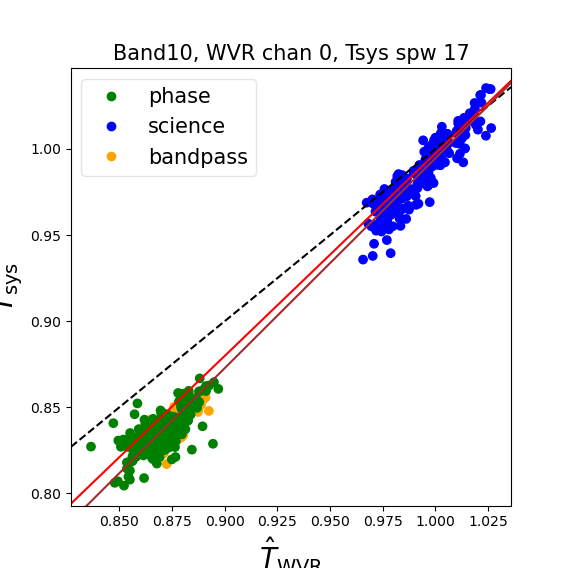

In [8]:
datDir = 'C:/Users/haohe/OneDrive - McMaster University/Astrotech/ALMA_intern/ALMA_intern_Tsys/examples/2015.1.00271.S/'
picDir = 'C:/Users/haohe/OneDrive - McMaster University/Astrotech/ALMA_intern/submission_R2/pictures/'
filename = datDir+'Tsys_WVR_matched_avgTime10.pkl'
with open (filename, 'rb') as pickle_file:
    Tsys_table = pickle.load(pickle_file, encoding='latin')
iants = Tsys_table['iant']
obs_type = Tsys_table['obs_type']
obs_type = obs_type.astype(str)
scans = Tsys_table['scan']
WVR = Tsys_table['WVR_means']
Tsys = Tsys_table['Tsys']
# exclude bad antennas. 
Tsys[np.where(iants==30),:] = np.nan
Tsys[np.where(iants==36),:] = np.nan
Tsys[np.where(iants==2),:] = np.nan
# import the fitting relation from all scans
fitfile = datDir+'Tsys_WVR_fitted_WVRchan0_normScans000.pkl'
with open(fitfile,'rb') as pickle_file:
    fit_table = pickle.load(pickle_file, encoding='latin')
    
WVR_sinchan = WVR[:,0]
obs_type_temp = np.chararray(np.shape(obs_type), itemsize=10, unicode=False)
obs_type_temp[:] = 'science'
obs_type_temp = obs_type_temp.astype(str)
WVR_norm = normalize_array(WVR_sinchan, iants, obs_type_temp, normScans=[2])
Tsys_sinspw = Tsys[:,0]
Tsys_norm = normalize_array(Tsys_sinspw, iants, obs_type_temp, normScans=[2])

fig = plt.figure(figsize=(0.4*tex_textwidth, 0.4*tex_textwidth))
ax = plt.subplot(111)
# create color dictionary for the scatter plot
color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange'}
legendhandle = [plt.plot([], marker="o", ls="", color=color)[0] for color in list(color_dict.values())]
plt.legend(legendhandle,list(color_dict.keys()), loc='upper left', framealpha=0.5, fontsize=15)
# plot the scatter plot
sc = ax.scatter(WVR_norm, Tsys_norm, c=map_series_by_dict(obs_type, color_dict))
# plot the 1-to-1 line
lower=max(ax.set_xlim()[0], ax.set_ylim()[0])
upper=min(ax.set_xlim()[1], ax.set_ylim()[1])
ax.plot([lower, upper],[lower,upper],ls='--', color='black')
# plot the original fitted results
slope = fit_table[17]['coeff'][0]
intercept = fit_table[17]['coeff'][1]
xlow = ax.set_xlim()[0]; xhigh = ax.set_xlim()[1]
ylow = xlow * slope + intercept; yhigh = xhigh * slope + intercept
#     Tsys_norm_fitted_orig = slope * WVR_norm + intercept
plt.plot([xlow, xhigh], [ylow, yhigh], color='red', linestyle='solid')
# fit the linear relation between normalized Tsys and WVR
xdata = WVR_norm; ydata = Tsys_norm
# exclude the bandpass data in the fitting
ydata[np.where(obs_type=='bandpass')] = np.nan 
idx_nnan = ((~np.isnan(xdata)) & (~np.isnan(ydata)))
fit_results = np.polyfit(xdata[idx_nnan], ydata[idx_nnan], 1, full=True)
fit_coeff = fit_results[0]
fit_err = fit_results[1]
fit_err_rel = np.sqrt(fit_err / len(ydata[idx_nnan])) / np.mean(ydata[idx_nnan])
#     ydata_fitted = fit_coeff[0] * xdata + fit_coeff[1]
ylow = xlow * fit_coeff[0] + fit_coeff[1]; yhigh = xhigh * fit_coeff[0] + fit_coeff[1]                                                                                        
plt.plot([xlow, xhigh], [ylow, yhigh], color='brown', linestyle='solid')
# plot the title
title = 'Band10, WVR chan 0, Tsys spw 17'
plt.title(title,fontsize=15)
# label
plt.xlabel(r'$\hat{T}_\mathrm{WVR}$', fontsize=20)
plt.ylabel(r'$\hat{T}_\mathrm{sys}$', fontsize=20)
plt.savefig(picDir+'Tsys_Twvr_sci_norm_band10.pdf', bbox_inches='tight', pad_inches=0)